## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras
import itertools

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.7, 0.9, 0.95, 0.99]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr, momentum in itertools.product(LEARNING_RATE, MOMENTUM):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Momentum = %.2f" % (lr, momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s-momemtum-%s" % (str(lr), str(momentum))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000, Momentum = 0.70
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s - loss: 2.0465 - acc: 0.2458 - val_loss: 1.9809 - val_acc: 0.3078
Epoch 2/50
50000/50000 [==============================] - 1s - loss: 1.8176 - acc: 0.3481 - val_loss: 1.8753 - val_acc: 0.3265
Epoch 3/50
50000/50000 [==============================] - 1s - loss: 1.7061 - acc: 0.3858 - val_loss: 1.9203 - val_acc: 0.3389
Epoch 4/50
50000/50000 [==============================] - 1s - loss: 1.6539 - acc: 0.4068 - val_loss: 1.6850 - val_acc: 0.3884
Epoch 5/50
50000/50000 [==============================] - 1s - loss: 1.6072 - acc: 0.4240 - val_loss: 1.6083 - val_acc: 0.4217
Epoch 6/50
50000/50000 [=================

50000/50000 [==============================] - 1s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 1s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 1s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 1s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 2s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 2s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 1s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 1s - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5

50000/50000 [==============================] - 1s - loss: 2.3083 - acc: 0.1017 - val_loss: 2.3097 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 2s - loss: 2.3069 - acc: 0.1017 - val_loss: 2.3084 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 1s - loss: 2.3063 - acc: 0.0984 - val_loss: 2.3056 - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 2s - loss: 2.3061 - acc: 0.1002 - val_loss: 2.3044 - val_acc: 0.1000
Epoch 11/50
50000/50000 [==============================] - 2s - loss: 2.3063 - acc: 0.0986 - val_loss: 2.3060 - val_acc: 0.1000
Epoch 12/50
50000/50000 [==============================] - 2s - loss: 2.3054 - acc: 0.1002 - val_loss: 2.3053 - val_acc: 0.1000
Epoch 13/50
50000/50000 [==============================] - 2s - loss: 2.3070 - acc: 0.0989 - val_loss: 2.3094 - val_acc: 0.1000
Epoch 14/50
50000/50000 [==============================] - 2s - loss: 2.3065 - acc: 0.0983 - val_loss: 2.3045 - val_ac

50000/50000 [==============================] - 2s - loss: 1.3824 - acc: 0.5118 - val_loss: 1.5540 - val_acc: 0.4458
Epoch 13/50
50000/50000 [==============================] - 2s - loss: 1.3642 - acc: 0.5207 - val_loss: 1.4116 - val_acc: 0.5027
Epoch 14/50
50000/50000 [==============================] - 2s - loss: 1.3449 - acc: 0.5267 - val_loss: 1.4272 - val_acc: 0.4864
Epoch 15/50
50000/50000 [==============================] - 2s - loss: 1.3240 - acc: 0.5346 - val_loss: 1.4965 - val_acc: 0.4713
Epoch 16/50
50000/50000 [==============================] - 2s - loss: 1.3135 - acc: 0.5376 - val_loss: 1.3828 - val_acc: 0.5023
Epoch 17/50
50000/50000 [==============================] - 2s - loss: 1.2931 - acc: 0.5431 - val_loss: 1.4848 - val_acc: 0.4671
Epoch 18/50
50000/50000 [==============================] - 1s - loss: 1.2757 - acc: 0.5508 - val_loss: 1.4040 - val_acc: 0.4999
Epoch 19/50
50000/50000 [==============================] - 1s - loss: 1.2600 - acc: 0.5567 - val_loss: 1.3703 - val_

50000/50000 [==============================] - 2s - loss: 1.0896 - acc: 0.6155 - val_loss: 1.4656 - val_acc: 0.4995
Epoch 18/50
50000/50000 [==============================] - 2s - loss: 1.0727 - acc: 0.6228 - val_loss: 1.4137 - val_acc: 0.5141
Epoch 19/50
50000/50000 [==============================] - 1s - loss: 1.0474 - acc: 0.6293 - val_loss: 1.4774 - val_acc: 0.5004
Epoch 20/50
50000/50000 [==============================] - 1s - loss: 1.0201 - acc: 0.6402 - val_loss: 1.4076 - val_acc: 0.5122
Epoch 21/50
50000/50000 [==============================] - 2s - loss: 0.9920 - acc: 0.6501 - val_loss: 1.4133 - val_acc: 0.5213
Epoch 22/50
50000/50000 [==============================] - 1s - loss: 0.9741 - acc: 0.6562 - val_loss: 1.4998 - val_acc: 0.5012
Epoch 23/50
50000/50000 [==============================] - 2s - loss: 0.9545 - acc: 0.6627 - val_loss: 1.3369 - val_acc: 0.5438
Epoch 24/50
50000/50000 [==============================] - 2s - loss: 0.9328 - acc: 0.6703 - val_loss: 1.4465 - val_

50000/50000 [==============================] - 2s - loss: 0.9261 - acc: 0.6680 - val_loss: 1.4147 - val_acc: 0.5322
Epoch 23/50
50000/50000 [==============================] - 2s - loss: 0.9019 - acc: 0.6778 - val_loss: 1.4327 - val_acc: 0.5313
Epoch 24/50
50000/50000 [==============================] - 2s - loss: 0.8823 - acc: 0.6844 - val_loss: 1.3950 - val_acc: 0.5388
Epoch 25/50
50000/50000 [==============================] - 2s - loss: 0.8548 - acc: 0.6926 - val_loss: 1.4653 - val_acc: 0.5257
Epoch 26/50
50000/50000 [==============================] - 2s - loss: 0.8321 - acc: 0.7008 - val_loss: 1.4822 - val_acc: 0.5329
Epoch 27/50
50000/50000 [==============================] - 1s - loss: 0.8075 - acc: 0.7104 - val_loss: 1.5024 - val_acc: 0.5327
Epoch 28/50
50000/50000 [==============================] - 1s - loss: 0.7869 - acc: 0.7175 - val_loss: 1.4801 - val_acc: 0.5351
Epoch 29/50
50000/50000 [==============================] - 1s - loss: 0.7608 - acc: 0.7290 - val_loss: 1.4760 - val_

50000/50000 [==============================] - 2s - loss: 0.9929 - acc: 0.6419 - val_loss: 1.5230 - val_acc: 0.5115
Epoch 28/50
50000/50000 [==============================] - 2s - loss: 0.9642 - acc: 0.6552 - val_loss: 1.5624 - val_acc: 0.5015
Epoch 29/50
50000/50000 [==============================] - 2s - loss: 0.9735 - acc: 0.6487 - val_loss: 1.5821 - val_acc: 0.5106
Epoch 30/50
50000/50000 [==============================] - 2s - loss: 0.9632 - acc: 0.6537 - val_loss: 1.5772 - val_acc: 0.5024
Epoch 31/50
50000/50000 [==============================] - 1s - loss: 0.9494 - acc: 0.6589 - val_loss: 1.6166 - val_acc: 0.5024
Epoch 32/50
50000/50000 [==============================] - 2s - loss: 0.9170 - acc: 0.6703 - val_loss: 1.6117 - val_acc: 0.5104
Epoch 33/50
50000/50000 [==============================] - 2s - loss: 0.9011 - acc: 0.6742 - val_loss: 1.6554 - val_acc: 0.5102
Epoch 34/50
50000/50000 [==============================] - 1s - loss: 0.8926 - acc: 0.6807 - val_loss: 1.6751 - val_

50000/50000 [==============================] - 2s - loss: 1.5494 - acc: 0.4598 - val_loss: 1.5693 - val_acc: 0.4470
Epoch 33/50
50000/50000 [==============================] - 2s - loss: 1.5428 - acc: 0.4627 - val_loss: 1.5726 - val_acc: 0.4458
Epoch 34/50
50000/50000 [==============================] - 1s - loss: 1.5368 - acc: 0.4657 - val_loss: 1.5597 - val_acc: 0.4582
Epoch 35/50
50000/50000 [==============================] - 1s - loss: 1.5309 - acc: 0.4691 - val_loss: 1.5538 - val_acc: 0.4518
Epoch 36/50
50000/50000 [==============================] - 1s - loss: 1.5247 - acc: 0.4713 - val_loss: 1.5496 - val_acc: 0.4564
Epoch 37/50
50000/50000 [==============================] - 1s - loss: 1.5188 - acc: 0.4717 - val_loss: 1.5461 - val_acc: 0.4571
Epoch 38/50
50000/50000 [==============================] - 2s - loss: 1.5127 - acc: 0.4743 - val_loss: 1.5457 - val_acc: 0.4561
Epoch 39/50
50000/50000 [==============================] - 2s - loss: 1.5071 - acc: 0.4756 - val_loss: 1.5500 - val_

50000/50000 [==============================] - 1s - loss: 1.2502 - acc: 0.5619 - val_loss: 1.3665 - val_acc: 0.5176
Epoch 38/50
50000/50000 [==============================] - 2s - loss: 1.2433 - acc: 0.5636 - val_loss: 1.3803 - val_acc: 0.5118
Epoch 39/50
50000/50000 [==============================] - 1s - loss: 1.2332 - acc: 0.5653 - val_loss: 1.3979 - val_acc: 0.5008
Epoch 40/50
50000/50000 [==============================] - 2s - loss: 1.2251 - acc: 0.5677 - val_loss: 1.3912 - val_acc: 0.5087
Epoch 41/50
50000/50000 [==============================] - 2s - loss: 1.2162 - acc: 0.5728 - val_loss: 1.3642 - val_acc: 0.5175
Epoch 42/50
50000/50000 [==============================] - 2s - loss: 1.2077 - acc: 0.5753 - val_loss: 1.3965 - val_acc: 0.5045
Epoch 43/50
50000/50000 [==============================] - 2s - loss: 1.2012 - acc: 0.5788 - val_loss: 1.3602 - val_acc: 0.5197
Epoch 44/50
50000/50000 [==============================] - 1s - loss: 1.1919 - acc: 0.5814 - val_loss: 1.4261 - val_

50000/50000 [==============================] - 2s - loss: 0.9749 - acc: 0.6575 - val_loss: 1.3504 - val_acc: 0.5334
Epoch 43/50
50000/50000 [==============================] - 2s - loss: 0.9633 - acc: 0.6620 - val_loss: 1.3841 - val_acc: 0.5235
Epoch 44/50
50000/50000 [==============================] - 1s - loss: 0.9550 - acc: 0.6636 - val_loss: 1.3424 - val_acc: 0.5399
Epoch 45/50
50000/50000 [==============================] - 1s - loss: 0.9368 - acc: 0.6709 - val_loss: 1.4581 - val_acc: 0.5064
Epoch 46/50
50000/50000 [==============================] - 2s - loss: 0.9281 - acc: 0.6748 - val_loss: 1.3685 - val_acc: 0.5350
Epoch 47/50
50000/50000 [==============================] - 1s - loss: 0.9147 - acc: 0.6765 - val_loss: 1.3919 - val_acc: 0.5295
Epoch 48/50
50000/50000 [==============================] - 1s - loss: 0.9037 - acc: 0.6839 - val_loss: 1.3884 - val_acc: 0.5293
Epoch 49/50
50000/50000 [==============================] - 1s - loss: 0.8943 - acc: 0.6856 - val_loss: 1.5218 - val_

50000/50000 [==============================] - 2s - loss: 0.4781 - acc: 0.8306 - val_loss: 1.8682 - val_acc: 0.5271
Epoch 48/50
50000/50000 [==============================] - 2s - loss: 0.4707 - acc: 0.8329 - val_loss: 1.8783 - val_acc: 0.5229
Epoch 49/50
50000/50000 [==============================] - 2s - loss: 0.4568 - acc: 0.8371 - val_loss: 1.9201 - val_acc: 0.5233
Epoch 50/50
50000/50000 [==============================] - 2s - loss: 0.4592 - acc: 0.8381 - val_loss: 1.9651 - val_acc: 0.5243
Experiment with LR = 0.000100, Momentum = 0.70
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               13

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s - loss: 2.2684 - acc: 0.1622 - val_loss: 2.2115 - val_acc: 0.2100
Epoch 2/50
50000/50000 [==============================] - 2s - loss: 2.1764 - acc: 0.2314 - val_loss: 2.1486 - val_acc: 0.2515
Epoch 3/50
50000/50000 [==============================] - 2s - loss: 2.1218 - acc: 0.2617 - val_loss: 2.1005 - val_acc: 0.2695
Epoch 4/50
50000/50000 [==============================] - 2s - loss: 2.0774 - acc: 0.2783 - val_loss: 2.0598 - val_acc: 0.2794
Epoch 5/50
50000/50000 [==============================] - 2s - loss: 2.0399 - acc: 0.2890 - val_loss: 2.0254 - val_acc: 0.2931
Epoch 6/50
50000/50000 [==============================] - 2s - loss: 2.0083 - acc: 0.2995 - val_loss: 1.9964 - val_acc: 0.3018
Epoch 7/50
50000/50000 [==============================] - 2s - loss: 1.9818 - acc: 0.3080 - val_loss: 1.9718 - val_acc: 0.3095
Epoch 8/50
50000/50000 [==============================] - 2s 

50000/50000 [==============================] - 2s - loss: 1.9062 - acc: 0.3383 - val_loss: 1.8963 - val_acc: 0.3435
Epoch 7/50
50000/50000 [==============================] - 2s - loss: 1.8810 - acc: 0.3468 - val_loss: 1.8740 - val_acc: 0.3463
Epoch 8/50
50000/50000 [==============================] - 3s - loss: 1.8596 - acc: 0.3552 - val_loss: 1.8544 - val_acc: 0.3549
Epoch 9/50
50000/50000 [==============================] - 2s - loss: 1.8419 - acc: 0.3615 - val_loss: 1.8370 - val_acc: 0.3640
Epoch 10/50
50000/50000 [==============================] - 2s - loss: 1.8260 - acc: 0.3671 - val_loss: 1.8228 - val_acc: 0.3644
Epoch 11/50
50000/50000 [==============================] - 2s - loss: 1.8112 - acc: 0.3707 - val_loss: 1.8096 - val_acc: 0.3747
Epoch 12/50
50000/50000 [==============================] - 2s - loss: 1.7980 - acc: 0.3764 - val_loss: 1.7983 - val_acc: 0.3749
Epoch 13/50
50000/50000 [==============================] - 2s - loss: 1.7857 - acc: 0.3806 - val_loss: 1.7840 - val_acc

50000/50000 [==============================] - 2s - loss: 1.6010 - acc: 0.4411 - val_loss: 1.6038 - val_acc: 0.4338
Epoch 12/50
50000/50000 [==============================] - 3s - loss: 1.5802 - acc: 0.4486 - val_loss: 1.5860 - val_acc: 0.4409
Epoch 13/50
50000/50000 [==============================] - 2s - loss: 1.5616 - acc: 0.4545 - val_loss: 1.5706 - val_acc: 0.4483
Epoch 14/50
50000/50000 [==============================] - 2s - loss: 1.5437 - acc: 0.4623 - val_loss: 1.5541 - val_acc: 0.4524
Epoch 15/50
50000/50000 [==============================] - 3s - loss: 1.5290 - acc: 0.4674 - val_loss: 1.5442 - val_acc: 0.4554
Epoch 16/50
50000/50000 [==============================] - 2s - loss: 1.5146 - acc: 0.4694 - val_loss: 1.5353 - val_acc: 0.4578
Epoch 17/50
50000/50000 [==============================] - 2s - loss: 1.4984 - acc: 0.4756 - val_loss: 1.5262 - val_acc: 0.4599
Epoch 18/50
50000/50000 [==============================] - 3s - loss: 1.4845 - acc: 0.4821 - val_loss: 1.5117 - val_

50000/50000 [==============================] - 2s - loss: 2.2561 - acc: 0.1580 - val_loss: 2.2549 - val_acc: 0.1592
Epoch 17/50
50000/50000 [==============================] - 3s - loss: 2.2530 - acc: 0.1600 - val_loss: 2.2517 - val_acc: 0.1623
Epoch 18/50
50000/50000 [==============================] - 2s - loss: 2.2499 - acc: 0.1620 - val_loss: 2.2487 - val_acc: 0.1638
Epoch 19/50
50000/50000 [==============================] - 2s - loss: 2.2469 - acc: 0.1644 - val_loss: 2.2457 - val_acc: 0.1663
Epoch 20/50
50000/50000 [==============================] - 2s - loss: 2.2440 - acc: 0.1663 - val_loss: 2.2427 - val_acc: 0.1678
Epoch 21/50
50000/50000 [==============================] - 2s - loss: 2.2412 - acc: 0.1683 - val_loss: 2.2399 - val_acc: 0.1704
Epoch 22/50
50000/50000 [==============================] - 2s - loss: 2.2384 - acc: 0.1704 - val_loss: 2.2371 - val_acc: 0.1721
Epoch 23/50
50000/50000 [==============================] - 3s - loss: 2.2357 - acc: 0.1724 - val_loss: 2.2345 - val_

50000/50000 [==============================] - 3s - loss: 2.1504 - acc: 0.2405 - val_loss: 2.1477 - val_acc: 0.2375
Epoch 22/50
50000/50000 [==============================] - 2s - loss: 2.1450 - acc: 0.2423 - val_loss: 2.1423 - val_acc: 0.2415
Epoch 23/50
50000/50000 [==============================] - 2s - loss: 2.1396 - acc: 0.2442 - val_loss: 2.1371 - val_acc: 0.2442
Epoch 24/50
50000/50000 [==============================] - 2s - loss: 2.1344 - acc: 0.2476 - val_loss: 2.1320 - val_acc: 0.2469
Epoch 25/50
50000/50000 [==============================] - 3s - loss: 2.1293 - acc: 0.2493 - val_loss: 2.1270 - val_acc: 0.2490
Epoch 26/50
50000/50000 [==============================] - 3s - loss: 2.1243 - acc: 0.2518 - val_loss: 2.1221 - val_acc: 0.2526
Epoch 27/50
50000/50000 [==============================] - 2s - loss: 2.1194 - acc: 0.2542 - val_loss: 2.1173 - val_acc: 0.2542
Epoch 28/50
50000/50000 [==============================] - 2s - loss: 2.1146 - acc: 0.2563 - val_loss: 2.1126 - val_

50000/50000 [==============================] - 2s - loss: 1.9936 - acc: 0.2927 - val_loss: 1.9940 - val_acc: 0.2961
Epoch 27/50
50000/50000 [==============================] - 2s - loss: 1.9878 - acc: 0.2961 - val_loss: 1.9885 - val_acc: 0.2960
Epoch 28/50
50000/50000 [==============================] - 2s - loss: 1.9822 - acc: 0.2972 - val_loss: 1.9831 - val_acc: 0.2983
Epoch 29/50
50000/50000 [==============================] - 2s - loss: 1.9769 - acc: 0.2992 - val_loss: 1.9781 - val_acc: 0.3004
Epoch 30/50
50000/50000 [==============================] - 2s - loss: 1.9719 - acc: 0.3019 - val_loss: 1.9732 - val_acc: 0.3012
Epoch 31/50
50000/50000 [==============================] - 2s - loss: 1.9670 - acc: 0.3032 - val_loss: 1.9685 - val_acc: 0.3030
Epoch 32/50
50000/50000 [==============================] - 2s - loss: 1.9623 - acc: 0.3055 - val_loss: 1.9639 - val_acc: 0.3051
Epoch 33/50
50000/50000 [==============================] - 2s - loss: 1.9578 - acc: 0.3072 - val_loss: 1.9595 - val_

50000/50000 [==============================] - 2s - loss: 1.7885 - acc: 0.3823 - val_loss: 1.7887 - val_acc: 0.3791
Epoch 32/50
50000/50000 [==============================] - 2s - loss: 1.7835 - acc: 0.3839 - val_loss: 1.7843 - val_acc: 0.3827
Epoch 33/50
50000/50000 [==============================] - 2s - loss: 1.7781 - acc: 0.3863 - val_loss: 1.7792 - val_acc: 0.3846
Epoch 34/50
50000/50000 [==============================] - 2s - loss: 1.7736 - acc: 0.3853 - val_loss: 1.7752 - val_acc: 0.3838
Epoch 35/50
50000/50000 [==============================] - 2s - loss: 1.7689 - acc: 0.3868 - val_loss: 1.7702 - val_acc: 0.3829
Epoch 36/50
50000/50000 [==============================] - 2s - loss: 1.7636 - acc: 0.3901 - val_loss: 1.7651 - val_acc: 0.3848
Epoch 37/50
50000/50000 [==============================] - 2s - loss: 1.7591 - acc: 0.3915 - val_loss: 1.7609 - val_acc: 0.3871
Epoch 38/50
50000/50000 [==============================] - 2s - loss: 1.7549 - acc: 0.3926 - val_loss: 1.7568 - val_

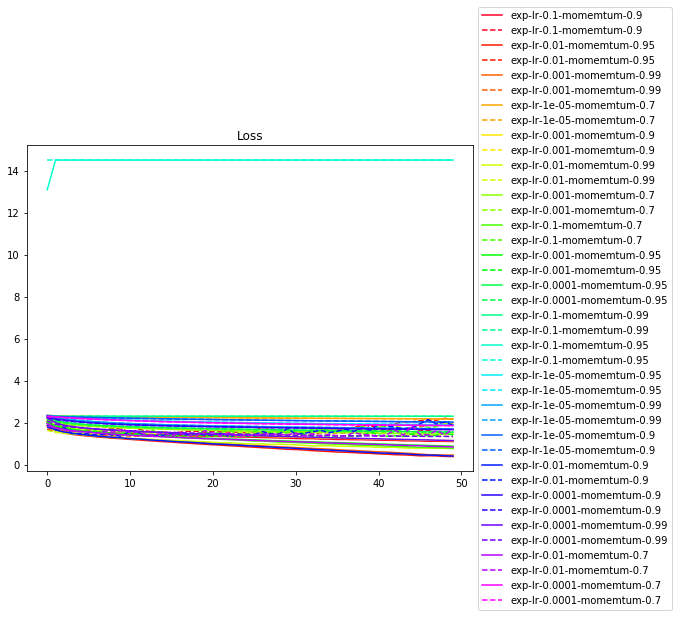

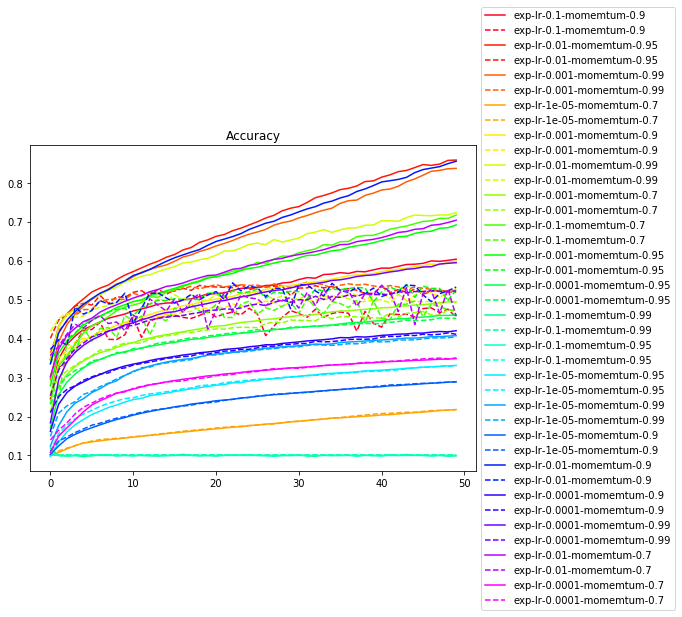

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()